<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 371: Data Mining Applications</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<h3 style="font-weight:bold">Due Date: Sunday, Nov. 14, 2021</h3>
</div>

## **DON'T FORGET TO PUT YOUR NAME BELOW**

### **NAME**: Haoran Zhao


### A. What to Hand In
	
1. A completed this Jupyter notebook.
2. Any data files and multimedia used in the assignment. 

### B. How to Hand In

Submit your files through the course website in the Blackboard Learn system.

### C. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.



# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from google.colab import files

# Import the classifiers: KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, and MultinomialNB

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Import CountVectorizer and TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import evaluation metrics

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Import the train_test_split function

In [ ]:
from sklearn.model_selection import train_test_split

# Answer the following questions

## Question 1 [5 points]: Collecting and uploading the movie review data.
In this assignment, you will apply various classification models and text vectorizations for sentiment analysis on movie reviews. The original data are from: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews It contains 50K movie reviews. To reduce the size of the data, I have extracted 5K random reviews to this file: `imdb_reviews_5k.csv`. You can work on this small data set in this assignment. Now, upload the 5k reviews and read them in as a DataFrame. Show the columns and size of the data. Display the first 5 rows. 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
file = "/content/drive/MyDrive/Colab Notebooks/imdb_reviews_5k.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file)

In [ ]:
df.shape

(5000, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.head()

,review,sentiment
0,Uggh! Hanna-Barbera of the 60s and 70s! What l...,negative
1,Cinema's greatest period started in post-War E...,positive
2,"I waited almost 25 years to see this movie, th...",negative
3,Ok so I was bored and I watched it all the way...,negative
4,With a humor that would appeal to an exclusive...,negative


In [ ]:
df.tail()

,review,sentiment
4995,"""Dangerous Offender"" is the story of a seeming...",positive
4996,THE CHOKE (aka AXE in the UK) is a slasher pro...,negative
4997,Kar Wai Wong's incredibly impressive romance t...,positive
4998,Not only was the plot of this film contrived w...,negative
4999,This had to be one of the worst movies I've ev...,negative


In [ ]:
df.loc[0].review

'Uggh! Hanna-Barbera of the 60s and 70s! What lousy and unwatchable cartoons that were thrust upon us by these hacks! It\'s a shame really, as in the 1940s and 1950s "Hanna-Barbera" meant quality--because they produced so many wonderful Tom and Jerry cartoons. However, with the major cost-cutting efforts of the late 1950s, cartoons in general began to look pretty poor and budgets were slashed. In fact, William Hanna and Joseph Barbera were fired by MGM and replaced by a team of Czech animators who had never even seen the original cartoons! So, in the late 50s, the team was out of work and decided "if you can\'t beat \'em, join \'em"--and began producing horrid little cartoons themselves--with horrible animation, backgrounds and writing.<br /><br />It\'s unfortunate, but the team\'s production of crappy cartoons worked too well---making them rich and the most successful producers of cartoons of the 60s and 70s. During this time, again and again, bad production values was their norm and 

In [ ]:
df.loc[0].sentiment

'negative'

## Question 2 [5 points]: Show the distribution of the sentiment values (positive and negative). Are the values evenly distributed in the data set?

In [ ]:
df.sentiment.value_counts()

negative    2521
positive    2479
Name: sentiment, dtype: int64

I don't think the values is evenly distributed in the dataset. Because the number of negative ones is 2521, and the number of positive ones is 2479. These two numbers are not the same. So the values are not evenly distributed.

## Question 3 [10 points]: You will use the sentiment values as classification labels. Extract the target labels `y` by converting the sentiment values to 1 and 0.  

In [ ]:
y = df.sentiment.map({'positive': 1, 'negative': 0})
y

0       0
1       1
2       0
3       0
4       0
       ..
4995    1
4996    0
4997    1
4998    0
4999    0
Name: sentiment, Length: 5000, dtype: int64

## Question 4 [10 points]: Prepare training and test data sets. 
Split the review text and target labels into review_train, review_test, y_train, and y_test. Use 80% of the data for taining and 20% for test. Do you need to consider statification when splitting?

In [ ]:
df.sentiment.value_counts()

negative    2521
positive    2479
Name: sentiment, dtype: int64

We need to consider statification. Because through my count, finding the negative and positive sentiments are not the same So in this dataset, the data is not evenly distributed. So we need to use "stratify" parameter in the "train_test_split" function

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
review_train, review_test, y_train, y_test = train_test_split(df.review, y, stratify = y, test_size = 0.2, random_state = 42)

## Question 5 [50 points]: Classify the sentiment of the reviews using the combinations of various classifiers and vectorizers.
In this assignment, you should use the following list of models with default parameters: 
```
models= {'knn': KNeighborsClassifier(), 'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'nb':MultinomialNB()}
``` 
and the following list of vectorizers:
```
vectorizers = {'bow_binary':CountVectorizer(ngram_range = (1,1), binary=True), \
               'bow_count': CountVectorizer(ngram_range = (1,1)), \
               'tfidf': TfidfVectorizer()}
```
The total number of combinations is 12. Compare the performance of the 12 model combinations in terms of `precision`, `recall`, and `f1-measure`. Visualize the performance as illustrated in the following figure:
![performance_comparison](https://i.imgur.com/Z4QKCmp.png)

In [ ]:
model_name_list = ['knn_bow_binary', 'knn_bow_count', 'knn_tfidf', 'dt_bow_binary', 'dt_bow_count', 'dt_tfidf', 'rf_bow_binary', 'rf_bow_count', 'rf_tfidf', 'nb_bow_binary', 'nb_bow_count', 'nb_tfidf']

In [ ]:
models= {'knn': KNeighborsClassifier(), 'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'nb':MultinomialNB()}

vectorizers = {'bow_binary':CountVectorizer(ngram_range = (1,1), binary=True), \
               'bow_count': CountVectorizer(ngram_range = (1,1)), \
               'tfidf': TfidfVectorizer()}

In [ ]:
results = {}
for mkey in models:
    model = models[mkey]
    for vkey in vectorizers:
        vectorizer = vectorizers[vkey]
        X_train = vectorizer.fit_transform(review_train)
        X_test = vectorizer.transform(review_test)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        perf = precision_recall_fscore_support(y_test, preds, average="macro")
        model_name = mkey + "_" + vkey
        results[model_name] = perf[:3]

In [ ]:
results

{'dt_bow_binary': (0.6936842105263158, 0.6932123655913978, 0.6928645532679911),
 'dt_bow_count': (0.6899801587301587, 0.6899801587301587, 0.6899801587301587),
 'dt_tfidf': (0.6609755512080369, 0.6609543010752688, 0.6609589760361003),
 'knn_bow_binary': (0.5780592405306364,
  0.5780529953917051,
  0.5779983119932479),
 'knn_bow_count': (0.6023336441572633, 0.5996543778801844, 0.5966082905546988),
 'knn_tfidf': (0.6523680997365208, 0.6517537122375832, 0.6515484067351287),
 'nb_bow_binary': (0.8281894994840042, 0.8256688428059396, 0.8255981782025787),
 'nb_bow_count': (0.8204588325671376, 0.8187243983614951, 0.8186952266760423),
 'nb_tfidf': (0.8353811657337652, 0.824292754736303, 0.8234062413279851),
 'rf_bow_binary': (0.815117763081564, 0.8150761648745519, 0.814998334985015),
 'rf_bow_count': (0.8000512032770097, 0.8000512032770097, 0.7999999999999999),
 'rf_tfidf': (0.7963266849266584, 0.7947228622631849, 0.7946548147435839)}

In [ ]:
res_df = pd.DataFrame(results, index=['precision', 'recall', 'f1_measure'])
res_df

,knn_bow_binary,knn_bow_count,knn_tfidf,dt_bow_binary,dt_bow_count,dt_tfidf,rf_bow_binary,rf_bow_count,rf_tfidf,nb_bow_binary,nb_bow_count,nb_tfidf
precision,0.578059,0.602334,0.652368,0.693684,0.68998,0.660976,0.815118,0.800051,0.796327,0.828189,0.820459,0.835381
recall,0.578053,0.599654,0.651754,0.693212,0.68998,0.660954,0.815076,0.800051,0.794723,0.825669,0.818724,0.824293
f1_measure,0.577998,0.596608,0.651548,0.692865,0.68998,0.660959,0.814998,0.800000,0.794655,0.825598,0.818695,0.823406


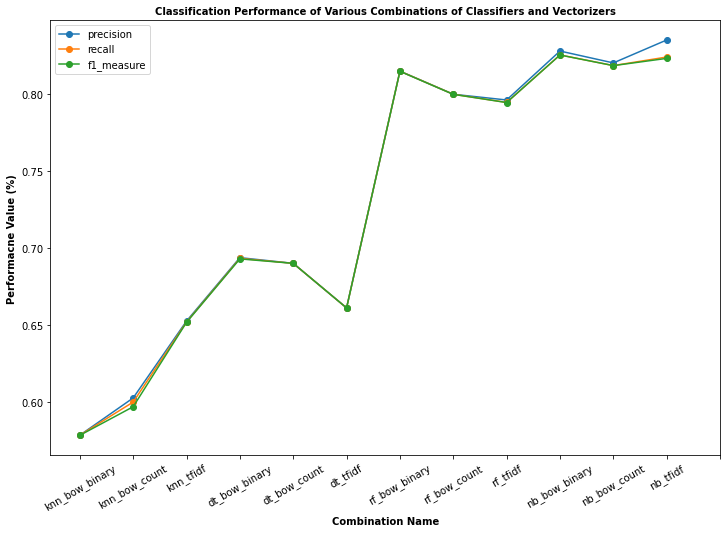

In [ ]:
res_df.T.plot(figsize=(12, 8), marker="o")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], model_name_list, rotation=30)
plt.title('Classification Performance of Various Combinations of Classifiers and Vectorizers', fontdict={'fontweight':'bold', 'fontsize':10})
plt.xlabel('Combination Name', fontdict={'fontweight':'bold', 'fontsize':10})
plt.ylabel('Performacne Value (%)',fontdict={'fontweight':'bold', 'fontsize':10})
plt.show()


## Question 6 [20 points]: Discuss the performance of the various model and vectorizer combinations. Which type of model gave a better performance? Do the vectorization methods affect the performance? Do you have any suggestions on changing the model parameters that could improve the performance? Why? 

After evaluating all 12 models, the MultinOmialNB_bow_binary is the best choice. 

The whole performance of Naive Bayes is at a really high level.The KNN models' performance is the lowest based on this dataset. And we could find using tfidf method to vectorize text always has a better performance. However, the performance of CountVectorizer method is highly related to the model we chosen. 

I want to see if we can add a customized tokenizer, the whole performance of all models may could improve, but the time we need may increase. The reason why I think using tokenizer is a good option is we could add stopwords to our vectorizer and could use methods like stemming/lemmatization to generalize our models and have a better performance on test data.